# 구글 플레이스토어 데이터 분석 및 시각화

- Kaggle에 있는 Google Playstore 데이터를 이용하여 변수별 다운로드 수를 종족변수로하여 변수 별로 비교, 분석한다.

### 데이터 분석, 시각화, 처리를 위해 필요한 모듈 불러오기

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### 데이터 불러오기

In [2]:
playstore_data = pd.read_csv('googleplaystore.csv')

##### 데이터가 잘 왔는지 간단하게 head()를 통하여 확인

In [3]:
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##### 결측값 확인하기

In [4]:
playstore_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

##### 결측값 제거

In [5]:
playstore_data.dropna(inplace=True, subset=['Type','Content Rating','Current Ver','Android Ver', 'Rating'])

##### 데이터의 shape를 확인하고, 'App'(어플리케이션 이름)을 기준으로 unique()함수를 적용하여 겹치지 않는 값은 얼마나 있는지 확인

In [6]:
print('dataset의 행개수는 {}'.format(playstore_data.shape[0]))
print('dataset의 열개수는 {}'.format(playstore_data.shape[1]))
print('unique한 App의 개수는 {}'.format(len(playstore_data['App'].unique())))

dataset의 행개수는 9360
dataset의 열개수는 13
unique한 App의 개수는 8190


##### 중복된 행 제거

In [7]:
playstore_data= playstore_data.drop_duplicates(subset='App')

In [8]:
playstore_data.shape

(8190, 13)

\>> dataset의 행의 개수는 8190, 열의 개수는 13 (중복된 행이 정상적으로 제거되었다)

##### 각 열들의 특성 확인하기

In [9]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 10840
Data columns (total 13 columns):
App               8190 non-null object
Category          8190 non-null object
Rating            8190 non-null float64
Reviews           8190 non-null object
Size              8190 non-null object
Installs          8190 non-null object
Type              8190 non-null object
Price             8190 non-null object
Content Rating    8190 non-null object
Genres            8190 non-null object
Last Updated      8190 non-null object
Current Ver       8190 non-null object
Android Ver       8190 non-null object
dtypes: float64(1), object(12)
memory usage: 895.8+ KB


##### rating 데이터 분석

In [10]:
playstore_data['Rating'].describe()

count    8190.000000
mean        4.173321
std         0.536691
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

##### rating의 density estimates, 4점대 초반이 제일 많은 것을 알 수 있다

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


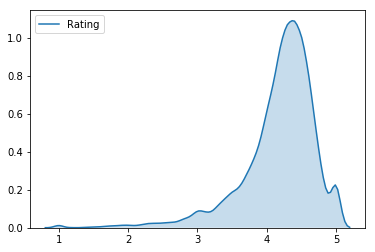

In [11]:
sns.kdeplot(shade=True,data=playstore_data['Rating'])

### Category, Installs, Type, Content Rating, Genres의 분포

In [12]:
df1 = playstore_data['Category']
df1 = df1.reset_index()

In [13]:
list_1 = ['Category', 'Installs', 'Type', 'Content Rating']
list_2 = ['Genres']

In [14]:
# 시각화 함수
def bar_plot1(x,y,y_label,x_label,title,color,ax):
    bar = sns.barplot(x = x,y=y,ax=ax,orient='h')
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)
    for i, v in enumerate(x.values):
        ax.text(v + 3, i+ .25, str(v), color='black', fontweight='bold')
    return bar

def bar_plot2(x,y,y_label,x_label,title,color,ax=None):
    plt.figure(figsize=(5,8))
    bar = sns.barplot(x = x,y=y,orient='h')
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)
    for i, v in enumerate(x.values):
        bar.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    return bar

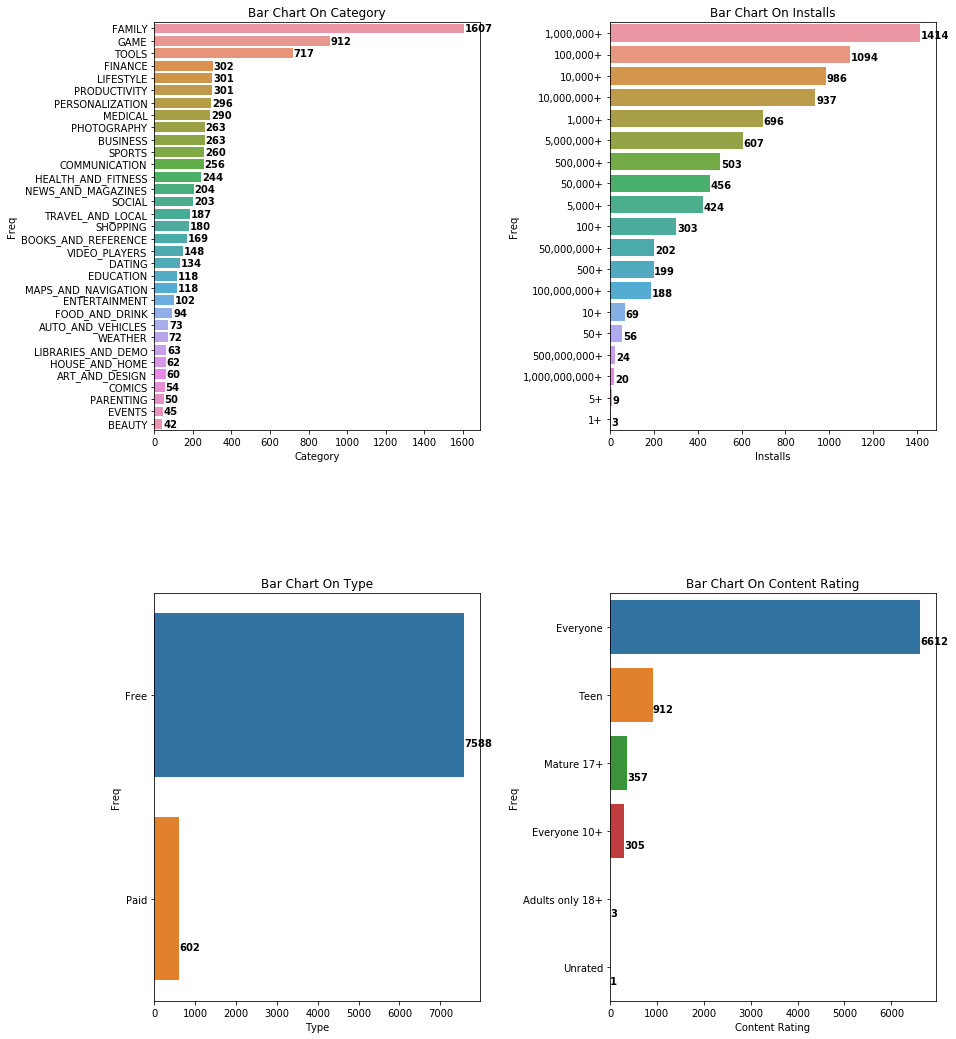

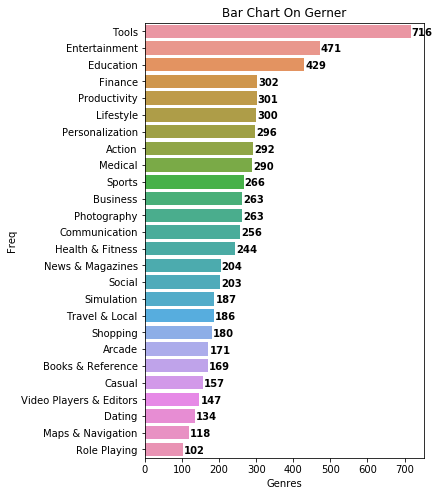

In [15]:
fig = plt.figure(figsize=(14,18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i = 1
for names in list_1:
    ax1 = fig.add_subplot(2, 2, i)
    df2 = playstore_data[names].value_counts()
    df2 = df2.reset_index()
    bar_plot1(x = df2[names],y = df2['index'],y_label = 'Freq',title = 'Bar Chart On {}'.format(names),color='red',ax=ax1,x_label=names)
    i += 1
df2 = playstore_data['Genres'].value_counts()
df2 = df2.reset_index()
df2 = df2[df2['Genres'] > 100]
bar_plot2(x = df2['Genres'],y = df2['index'],y_label = 'Freq',title = 'Bar Chart On Gerner',color='red',x_label='Genres')

##### Installs 값을 숫자로 변경

In [16]:
new_col_install = playstore_data['Installs'].apply(lambda a : a.replace('+','').replace(',',''))

def add_list(x):
    sum=' '
    for i in range(0,len(x)):
        sum+=x[i]
    return int(sum)  

playstore_data['Installs'] = new_col_install.apply(lambda a : add_list(a)) 

##### Price 값을 숫자로 변경

In [17]:
def remove_curr(x):
    if x !='0':
        x=x.split('$')[1]
    return float(x)   

playstore_data['Price'] = playstore_data['Price'].apply(lambda a : remove_curr(a))  

In [18]:
# 잘 변경되었는지 확인
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##### price의 density estimates

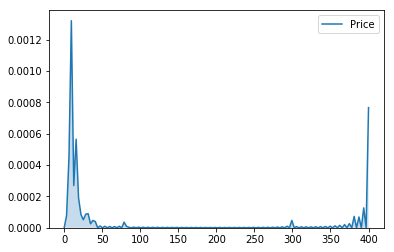

In [19]:
sns.kdeplot(shade=True,data=playstore_data['Price'])

### 무료/유료별 다운로드

In [20]:
playstore_data['Type'].value_counts()

Free    7588
Paid     602
Name: Type, dtype: int64

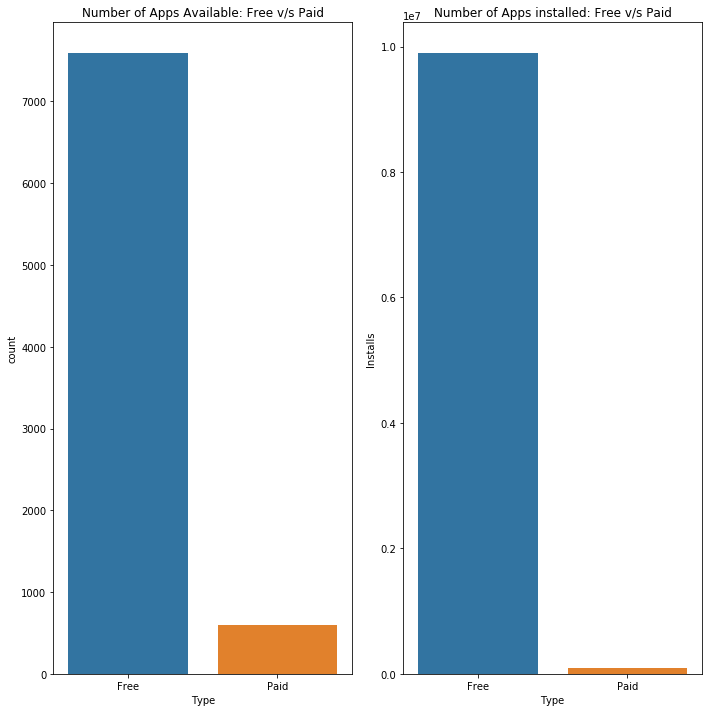

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.countplot(x='Type',data=playstore_data)
plt.title("Number of Apps Available: Free v/s Paid")

# Most installed apps based on Category
plt.subplot(1,2,2)
sns.barplot(x='Type',y='Installs',data=playstore_data, ci=None)
plt.title("Number of Apps installed: Free v/s Paid")
plt.tight_layout()

### 가격별 다운로드

Text(0.5, 1.0, 'Number of Apps installed based on Price')

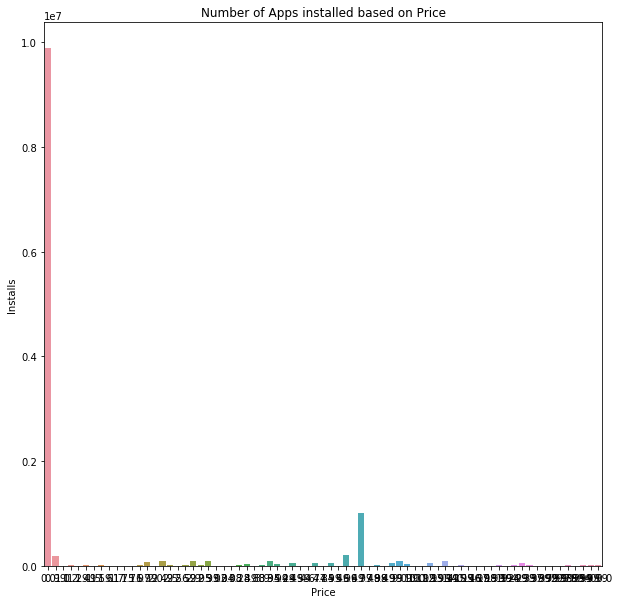

In [22]:
plt.figure(figsize=(10,10))
sns.barplot(x='Price',y='Installs',data=playstore_data,ci=None)
plt.title("Number of Apps installed based on Price")

### 카테고리 별 다운로드

Text(0.5, 1.0, 'Number of Apps installed based on Category')

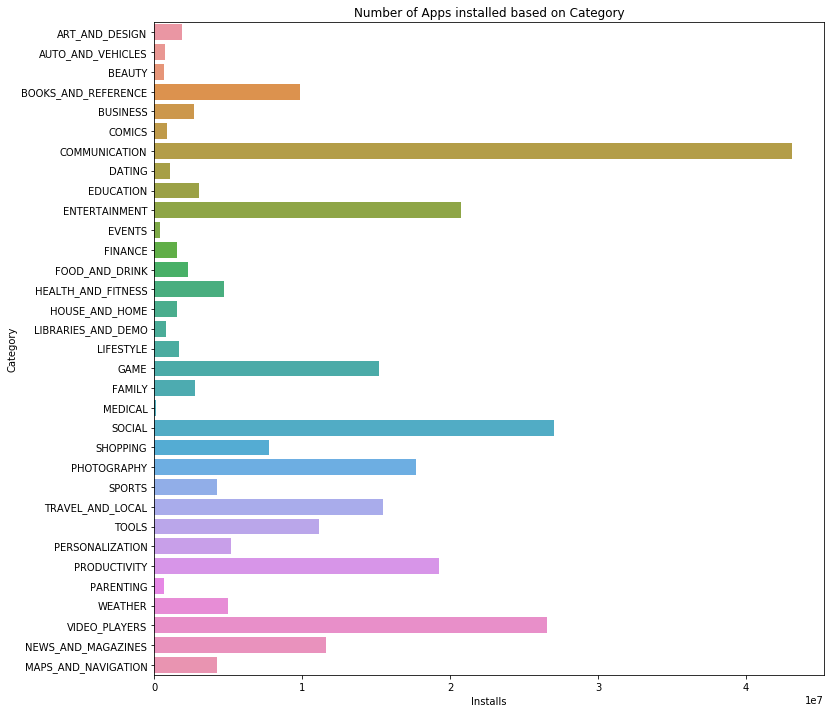

In [23]:
plt.figure(figsize=(12,12))
sns.barplot(x='Installs',y='Category',data=playstore_data,ci=None)
plt.title("Number of Apps installed based on Category")

### 콘텐츠 등급 별 다운로드

Text(0.5, 1.0, 'Number of Apps installed based on Content rating')

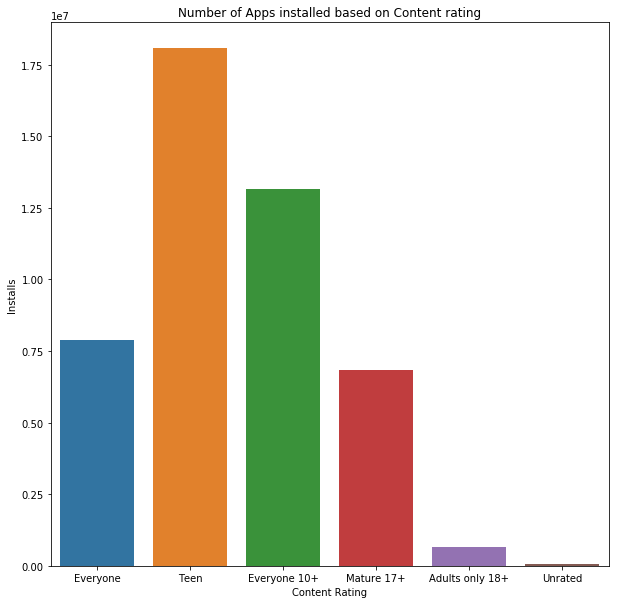

In [24]:
plt.figure(figsize=(10,10))
sns.barplot(x='Content Rating',y='Installs',data=playstore_data,ci=None)
plt.title("Number of Apps installed based on Content rating")

### 평점별 다운로드

Text(0.5, 1.0, 'Number of Apps and ratings ')

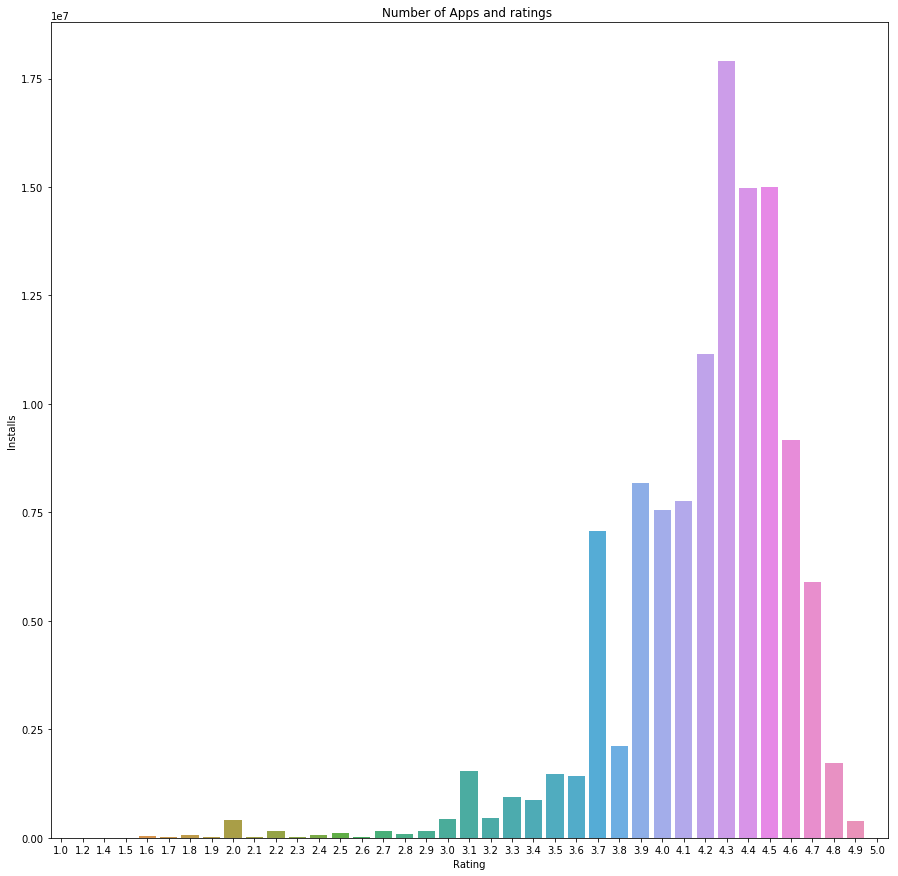

In [25]:
plt.figure(figsize=(15,15))
sns.barplot(y='Installs',x='Rating',data=playstore_data,ci=None)
plt.title("Number of Apps and ratings ")

##### 전처리한 데이터 저장

In [26]:
playstore_data.to_csv('new_data.csv')